In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 # Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
 # Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(0.5)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 8 of Set 1 | zhezkazgan
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | inuvik
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | yumen
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | samarai
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Re

Processing Record 32 of Set 4 | acin
City not found. Skipping...
Processing Record 33 of Set 4 | okhotsk
Processing Record 34 of Set 4 | jinji
Processing Record 35 of Set 4 | airai
Processing Record 36 of Set 4 | taicheng
Processing Record 37 of Set 4 | san vicente de canete
Processing Record 38 of Set 4 | marawi
Processing Record 39 of Set 4 | sabinopolis
Processing Record 40 of Set 4 | tabuk
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | aracatuba
Processing Record 43 of Set 4 | krasnyy chikoy
Processing Record 44 of Set 4 | georgiyevka
Processing Record 45 of Set 4 | skwierzyna
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | loksa
Processing Record 48 of Set 4 | natal
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | soe
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | taoudenni
Processing Record 4 of Set 5 | christchurch
Processing Record 5 of

Processing Record 25 of Set 8 | constitucion
Processing Record 26 of Set 8 | thompson
Processing Record 27 of Set 8 | birao
Processing Record 28 of Set 8 | torrington
Processing Record 29 of Set 8 | progreso
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | cherepet
Processing Record 32 of Set 8 | sayyan
Processing Record 33 of Set 8 | stende
Processing Record 34 of Set 8 | kyra
Processing Record 35 of Set 8 | monrovia
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 38 of Set 8 | ambilobe
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | yarmouth
Processing Record 42 of Set 8 | plettenberg bay
Processing Record 43 of Set 8 | eresos
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | kitimat
Processing Record 46 of Set 8 | asyut
Processing Record 47 of Set 8 | rundu
Processing Record 48 of Set 8 | kuta

Processing Record 11 of Set 12 | saint george
Processing Record 12 of Set 12 | bridlington
Processing Record 13 of Set 12 | klaksvik
Processing Record 14 of Set 12 | balykshi
Processing Record 15 of Set 12 | santa fe
Processing Record 16 of Set 12 | bihac
Processing Record 17 of Set 12 | chimbote
Processing Record 18 of Set 12 | mountain home
Processing Record 19 of Set 12 | codrington
Processing Record 20 of Set 12 | nantong
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | garden city
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | mapastepec
Processing Record 25 of Set 12 | bukama
Processing Record 26 of Set 12 | peace river
Processing Record 27 of Set 12 | kalaiya
Processing Record 28 of Set 12 | barinas
Processing Record 29 of Set 12 | saldanha
Processing Record 30 of Set 12 | pila
Processing Record 31 of Set 12 | evansville
Processing Record 32 of Set 12 | broome
Processing Record 33 of Set 12 

In [9]:
len(city_data)

543

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,44.71,70,75,14.97,CL,2022-05-11 05:11:25
1,Narsaq,60.9167,-46.0500,39.42,93,99,3.06,GL,2022-05-11 05:11:25
2,San Patricio,28.0170,-97.5169,80.83,85,80,11.03,US,2022-05-11 05:11:26
3,Albany,42.6001,-73.9662,50.45,56,0,2.95,US,2022-05-11 05:09:39
4,Castro,-24.7911,-50.0119,58.46,97,100,2.66,BR,2022-05-11 05:11:26
5,Jamestown,42.0970,-79.2353,62.24,49,0,5.75,US,2022-05-11 05:11:26
6,Zhezkazgan,47.8043,67.7144,58.98,58,75,13.42,KZ,2022-05-11 05:11:27
7,Saint-Philippe,-21.3585,55.7679,78.39,73,5,3.58,RE,2022-05-11 05:11:27
8,Inuvik,68.3499,-133.7218,31.21,90,100,7.92,CA,2022-05-11 05:11:28
9,Rawson,-43.3002,-65.1023,49.77,77,0,6.38,AR,2022-05-11 05:11:28


In [11]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-11 05:11:25,-53.1500,-70.9167,44.71,70,75,14.97
1,Narsaq,GL,2022-05-11 05:11:25,60.9167,-46.0500,39.42,93,99,3.06
2,San Patricio,US,2022-05-11 05:11:26,28.0170,-97.5169,80.83,85,80,11.03
3,Albany,US,2022-05-11 05:09:39,42.6001,-73.9662,50.45,56,0,2.95
4,Castro,BR,2022-05-11 05:11:26,-24.7911,-50.0119,58.46,97,100,2.66
5,Jamestown,US,2022-05-11 05:11:26,42.0970,-79.2353,62.24,49,0,5.75
6,Zhezkazgan,KZ,2022-05-11 05:11:27,47.8043,67.7144,58.98,58,75,13.42
7,Saint-Philippe,RE,2022-05-11 05:11:27,-21.3585,55.7679,78.39,73,5,3.58
8,Inuvik,CA,2022-05-11 05:11:28,68.3499,-133.7218,31.21,90,100,7.92
9,Rawson,AR,2022-05-11 05:11:28,-43.3002,-65.1023,49.77,77,0,6.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          543
Country       543
Date          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
dtype: int64

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

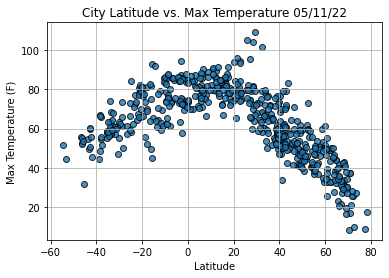

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

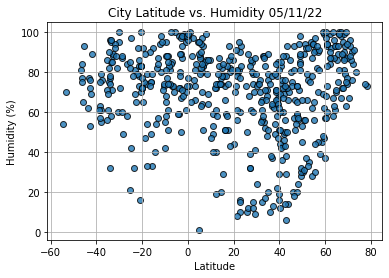

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

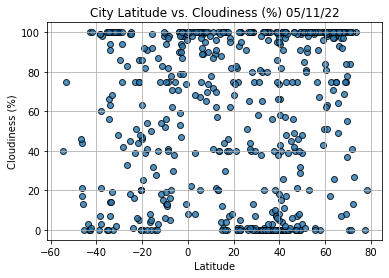

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

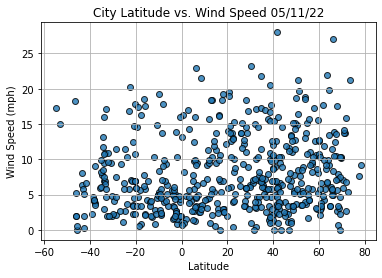

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Chapais
Country                        CA
Date          2022-05-11 05:11:30
Lat                       49.7834
Lng                      -74.8492
Max Temp                    59.32
Humidity                       45
Cloudiness                      3
Wind Speed                  12.68
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
538     True
539     True
540     True
541    False
542    False
Name: Lat, Length: 543, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Narsaq,GL,2022-05-11 05:11:25,60.9167,-46.0500,39.42,93,99,3.06
2,San Patricio,US,2022-05-11 05:11:26,28.0170,-97.5169,80.83,85,80,11.03
3,Albany,US,2022-05-11 05:09:39,42.6001,-73.9662,50.45,56,0,2.95
5,Jamestown,US,2022-05-11 05:11:26,42.0970,-79.2353,62.24,49,0,5.75
6,Zhezkazgan,KZ,2022-05-11 05:11:27,47.8043,67.7144,58.98,58,75,13.42
...,...,...,...,...,...,...,...,...,...
535,Ozinki,RU,2022-05-11 05:14:59,51.1786,49.6769,46.13,56,1,19.64
537,Imeni Zhelyabova,RU,2022-05-11 05:14:59,58.9544,36.5956,48.85,48,43,3.13
538,Ornskoldsvik,SE,2022-05-11 05:15:00,63.2909,18.7153,45.55,100,100,9.22
539,Bodden Town,KY,2022-05-11 05:15:00,19.2833,-81.2500,79.93,81,8,12.19


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Narsaq,GL,2022-05-11 05:11:25,60.9167,-46.0500,39.42,93,99,3.06
2,San Patricio,US,2022-05-11 05:11:26,28.0170,-97.5169,80.83,85,80,11.03
3,Albany,US,2022-05-11 05:09:39,42.6001,-73.9662,50.45,56,0,2.95
5,Jamestown,US,2022-05-11 05:11:26,42.0970,-79.2353,62.24,49,0,5.75
6,Zhezkazgan,KZ,2022-05-11 05:11:27,47.8043,67.7144,58.98,58,75,13.42


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

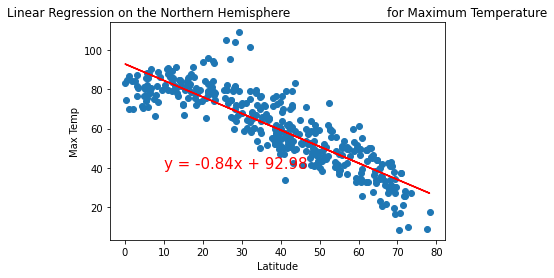

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

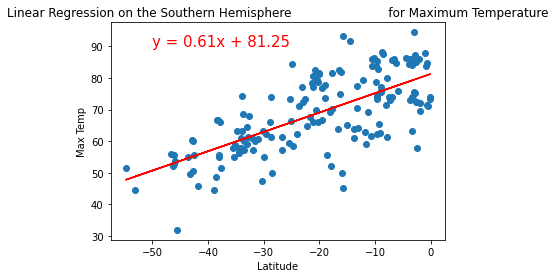

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

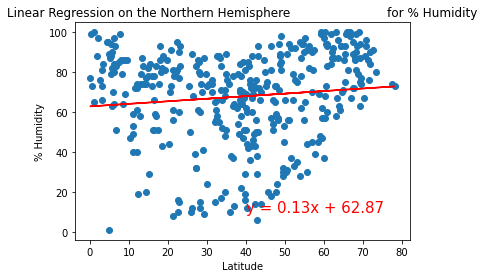

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

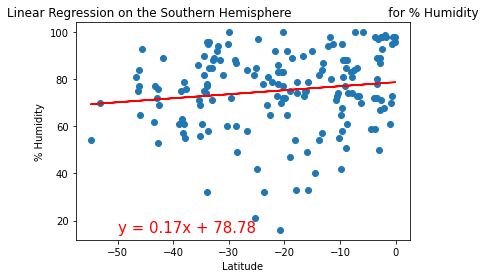

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

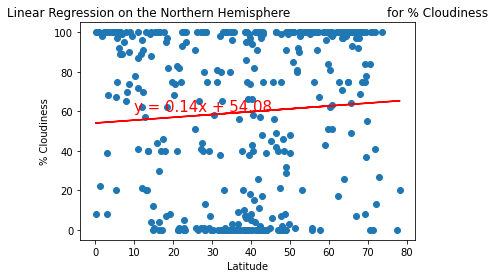

In [28]:
# Skill Drill: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

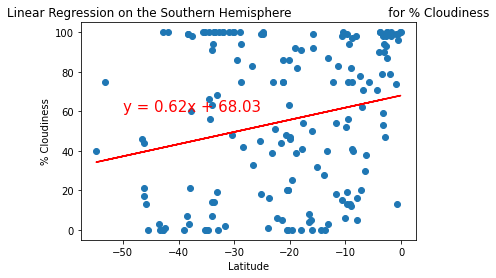

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

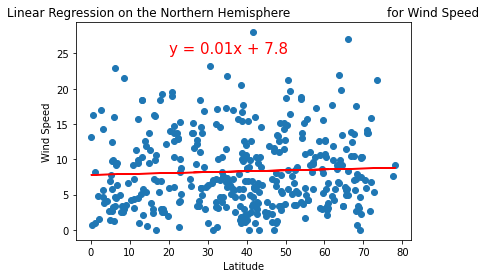

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

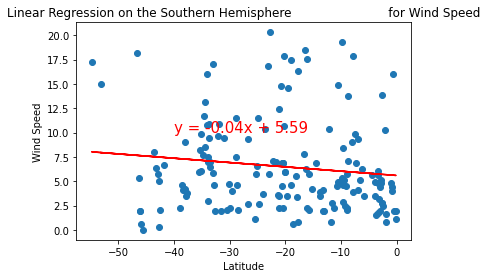

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,10))